<a href="https://colab.research.google.com/github/MonkeyWrenchGang/2024_BAN7040/blob/main/Organics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Case Summary: Predicting Organic Products Purchasers

#### Business Scenario:
A supermarket chain is launching a new line of organic products and aims to identify customers likely to purchase these items. They seek to profile these customers to tailor their marketing strategies effectively. Additionally, they want to explore if organic product purchasers are more profitable compared to other customers.

#### Data Description:
The supermarket has data from their customer loyalty program, which includes information on whether customers bought organic products after receiving promotional coupons. The dataset, containing 13 variables and over 22,000 observations, includes:
- **ID**: Customer loyalty identification number (Nominal)
- **DemAffl**: Affluence grade (Interval)
- **DemAge**: Age in years (Interval)
- **DemCluster**: Type of residential neighborhood (Nominal) - Rejected
- **DemClusterGroup**: Neighborhood group (Nominal)
- **DemGender**: Gender (Nominal)
- **DemRegion**: Geographic region (Nominal)
- **DemTVReg**: Television region (Nominal)
- **PromClass**: Loyalty status (Nominal)
- **PromSpend**: Total amount spent in the store this year (Interval)
- **PromTime**: Time as loyalty card member (Interval)
- **TargetBuy**: Purchased organics? (Binary, Target Variable)
- **TargetAmt**: Number of organic products purchased (Interval) - Rejected for modeling but useful for exploratory analysis

#### Tasks and Questions:
1. **Build a Predictive Model**:
   - Predict the likelihood of customers purchasing organic products.
   - Address missing values appropriately.
   - Explore and analyze the data for insights.

2. **Exploratory Analysis**:
   - Identify differences between customers who purchase organic products and those who don’t.
   - Examine differences in purchase behavior across loyalty status groups.
   - Determine factors influencing the likelihood of purchasing organic products.

3. **Customer Segmentation**:
   - Identify customer segments with the highest proportion of organic product purchasers.

#### Deliverables:
1. **Executive Summary Report**:
   - A 1-2 page summary for the marketing managers, explaining analysis results in business terms.
   - Provide actionable suggestions for marketing strategies.
   - Include an appendix with screenshots of relevant modeling outputs for technical analysts.

2. **Scored Dataset**:
   - Predict the likelihood of new loyalty card customers purchasing organic products.
   - Append predicted probabilities to the new dataset.
   - Sort customers by their likelihood of purchasing organic products and highlight those with a probability greater than 50%.

### Steps to Build the ML Model:

1. **Data Preprocessing**:
   - **Handle Missing Values**: Decide on strategies like imputation or exclusion.
   - **Feature Engineering**: Create new features or transform existing ones if necessary.
   - **Data Normalization**: Scale numerical features.

2. **Exploratory Data Analysis (EDA)**:
   - **Descriptive Statistics**: Summarize key statistics of the dataset.
   - **Correlation Analysis**: Identify relationships between features.
   - **Visualization**: Use charts and plots to visualize data distributions and relationships.

3. **Model Selection and Training**:
   - **Choose Algorithms**: Consider logistic regression, decision trees, random forests, etc.
   - **Train Models**: Split the data into training and testing sets and train multiple models.
   - **Evaluate Models**: Use metrics like accuracy, precision, recall, and AUC-ROC to evaluate model performance.

4. **Model Tuning**:
   - **Hyperparameter Tuning**: Optimize model parameters using techniques like grid search or random search.
   - **Cross-Validation**: Ensure model robustness by using cross-validation techniques.

5. **Final Model Selection**:
   - Select the best-performing model based on evaluation metrics.
   - Interpret the model to understand the most important features influencing organic product purchases.

6. **Scoring New Data**:
   - Apply the final model to the new customer data.
   - Append predicted probabilities to the dataset.
   - Sort and highlight customers with a high likelihood of purchasing organic products.

7. **Report and Documentation**:
   - Write the executive summary with actionable insights.
   - Include an appendix with detailed modeling steps, code, and outputs.
   - Ensure reproducibility of results by providing necessary documentation and code snippets.

In [35]:
import warnings
warnings.filterwarnings('ignore')

# -- pandas and numpy --
import numpy as np
import pandas as pd

# -- plotting --
import matplotlib.pyplot as plt
import seaborn as sns

# -- sklearn stuff --

# -- sklearn modules
from sklearn.model_selection import train_test_split   #- partition train/test split
from sklearn.ensemble import RandomForestClassifier    #- random forest classifier
from sklearn.ensemble import GradientBoostingClassifier #- gradient boosting classifier
from sklearn.tree import DecisionTreeClassifier         #- decision tree classifier

# -- we need these to make our pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV # NOTE...
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

# -- we need these to evaluate our models
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# -- need this to render charts in notebook --
%matplotlib inline

In [36]:
df = pd.read_excel('/content/organics.xlsx')
df.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


### Did it import correclty

In [37]:
df.shape

(22223, 13)

In [39]:
df.isna().sum()

,0
ID,0
DemAffl,1085
DemAge,1508
DemCluster,674
DemClusterGroup,674
DemGender,2512
DemReg,465
DemTVReg,465
PromClass,0
PromSpend,0


### Are the data types correct?

In [38]:
df.dtypes

,0
ID,int64
DemAffl,float64
DemAge,float64
DemCluster,float64
DemClusterGroup,object
DemGender,object
DemReg,object
DemTVReg,object
PromClass,object
PromSpend,float64


In [5]:
df['TargetBuy'].value_counts(normalize=True)

,proportion
TargetBuy,
0,0.752284
1,0.247716


In [40]:
df['TargetBuy'].value_counts()

,count
TargetBuy,
0,16718
1,5505


<Axes: xlabel='TargetBuy', ylabel='count'>

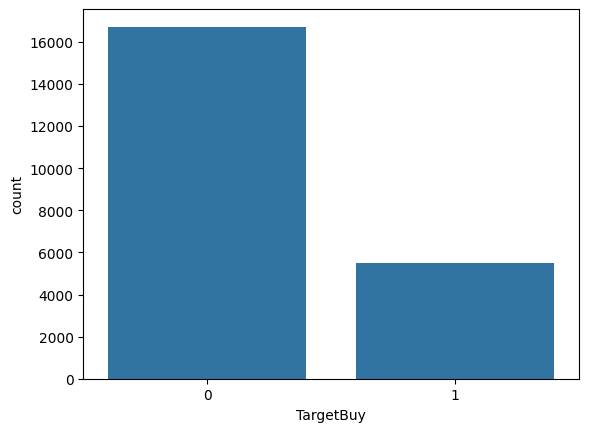

In [41]:
sns.countplot(data=df, x='TargetBuy')

<Axes: xlabel='DemAge', ylabel='Count'>

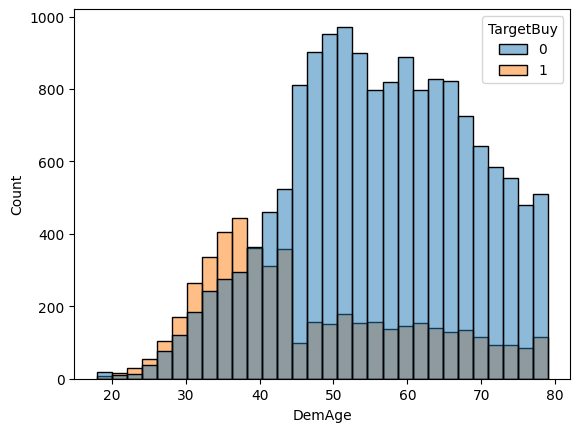

In [6]:
sns.histplot(data=df, x = 'DemAge', bins=30, hue="TargetBuy")

In [7]:
df['age_lt_40'] = np.where(df['DemAge'] < 40, 1, 0)
df['age_lt_40'].value_counts()

,count
age_lt_40,
0,18773
1,3450


In [8]:
ctab = pd.crosstab(df['age_lt_40'], df['TargetBuy']).reset_index()
ctab['pct_1'] = ctab[1] / (ctab[0] + ctab[1])
ctab['pct_0'] = ctab[0] / (ctab[0] + ctab[1])
ctab

TargetBuy,age_lt_40,0,1,pct_1,pct_0
0,0,15315,3458,0.184201,0.815799
1,1,1403,2047,0.593333,0.406667


In [31]:
df['age_lt_40'] = np.where((df['DemAge'] >= 30) & (df['DemAge'] < 50) , 1, 0)
df['age_lt_40'].value_counts()

,count
age_lt_40,
0,14744
1,7479


In [32]:
ctab = pd.crosstab(df['age_lt_40'], df['TargetBuy']).reset_index()
ctab['pct_1'] = ctab[1] / (ctab[0] + ctab[1])
ctab['pct_0'] = ctab[0] / (ctab[0] + ctab[1])
ctab

TargetBuy,age_lt_40,0,1,pct_1,pct_0
0,0,12143,2601,0.176411,0.823589
1,1,4575,2904,0.388287,0.611713


In [9]:
ctab = pd.crosstab(df['DemGender'], df['TargetBuy']).reset_index()
ctab['pct_1'] = ctab[1] / (ctab[0] + ctab[1])
ctab['pct_0'] = ctab[0] / (ctab[0] + ctab[1])
ctab

TargetBuy,DemGender,0,1,pct_1,pct_0
0,F,7944,4205,0.346119,0.653881
1,M,4849,966,0.166122,0.833878
2,U,1642,105,0.060103,0.939897


<Axes: xlabel='DemGender', ylabel='count'>

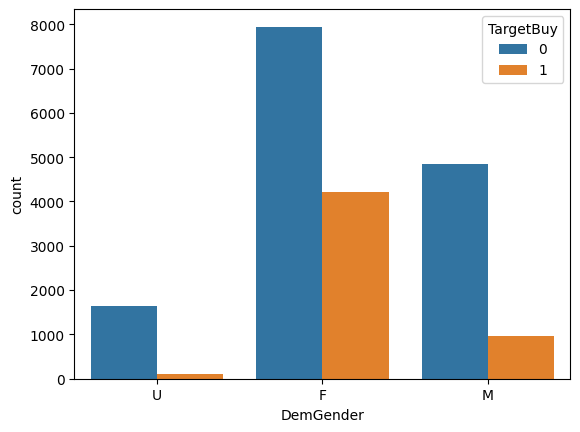

In [42]:
sns.countplot(data=df, x='DemGender', hue='TargetBuy')

In [28]:
ctab = pd.crosstab(df['DemReg'], df['TargetBuy']).reset_index()
ctab['pct_1'] = ctab[1] / (ctab[0] + ctab[1])
ctab['pct_0'] = ctab[0] / (ctab[0] + ctab[1])
ctab

TargetBuy,DemReg,0,1,pct_1,pct_0
0,Midlands,5034,1707,0.253227,0.746773
1,North,3312,1012,0.234043,0.765957
2,Scottish,1044,324,0.236842,0.763158
3,South East,6450,2184,0.252953,0.747047
4,South West,532,159,0.230101,0.769899


<Axes: xlabel='DemReg', ylabel='count'>

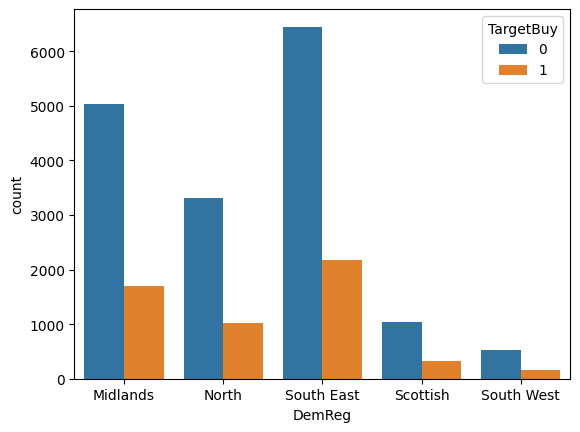

In [43]:
sns.countplot(data=df, x='DemReg', hue='TargetBuy')

In [10]:
ctab = pd.crosstab(df['PromClass'], df['TargetBuy']).reset_index()
ctab['pct_1'] = ctab[1] / (ctab[0] + ctab[1])
ctab['pct_0'] = ctab[0] / (ctab[0] + ctab[1])
ctab

TargetBuy,PromClass,0,1,pct_1,pct_0
0,Gold,5088,1236,0.195446,0.804554
1,Platinum,712,128,0.152381,0.847619
2,Silver,6460,2112,0.246384,0.753616
3,Tin,4458,2029,0.312779,0.687221


In [11]:
df['PromSpend'].describe()

,PromSpend
count,22223.000000
mean,4420.590041
std,7559.047522
min,0.010000
25%,0.010000
50%,2000.000000
75%,6000.000000
max,296313.850000


In [21]:
ctab = pd.crosstab(df['DemGender'], df['TargetBuy']).reset_index()
ctab['pct_1'] = ctab[1] / (ctab[0] + ctab[1])
ctab['pct_0'] = ctab[0] / (ctab[0] + ctab[1])
ctab

TargetBuy,DemGender,0,1,pct_1,pct_0
0,F,7944,4205,0.346119,0.653881
1,M,4849,966,0.166122,0.833878
2,U,1642,105,0.060103,0.939897


In [12]:
df['DemGender'].value_counts(normalize=True)

,proportion
DemGender,
F,0.616356
M,0.295013
U,0.088631


In [45]:
data = df.copy()

# Feature engineering
data['YearsAsLoyaltyMember'] = data['PromTime'] / 12
data['AvgMonthlySpend'] = data['PromSpend'] / data['PromTime']
data['HighSpender'] = (data['PromSpend'] > data['PromSpend'].median()).astype(int)

# Age Groups
bins = [18, 25, 35, 45, 55, 65, 75, 85, 95]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95']
data['AgeGroup'] = pd.cut(data['DemAge'], bins=bins, labels=labels, right=False)

# Affluence Levels
affluence_bins = [0, 5, 10, 15, 20, 25, 30]
affluence_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']
data['AffluenceLevel'] = pd.cut(data['DemAffl'], bins=affluence_bins, labels=affluence_labels, right=False)

# Display the first few rows of the engineered dataset
data.head()


,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt,YearsAsLoyaltyMember,AvgMonthlySpend,HighSpender,AgeGroup,AffluenceLevel
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0,0.333333,4000.000000,1,76-85,11-15
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0,0.416667,1200.000000,1,46-55,0-5
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1,0.666667,0.002500,0,66-75,6-10
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1,0.583333,0.001429,0,66-75,11-15
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0,0.666667,0.001250,0,66-75,11-15


In [47]:
ctab = pd.crosstab(data['AgeGroup'], data['TargetBuy']).reset_index()
ctab['pct_1'] = ctab[1] / (ctab[0] + ctab[1])
ctab['pct_0'] = ctab[0] / (ctab[0] + ctab[1])
ctab

TargetBuy,AgeGroup,0,1,pct_1,pct_0
0,18-25,43,52,0.547368,0.452632
1,26-35,659,931,0.585535,0.414465
2,36-45,1923,1881,0.494479,0.505521
3,46-55,4538,737,0.139716,0.860284
4,56-65,4130,735,0.151079,0.848921
5,66-75,3331,564,0.144801,0.855199
6,76-85,991,200,0.167926,0.832074


In [33]:
df.columns

Index(['ID', 'DemAffl', 'DemAge', 'DemCluster', 'DemClusterGroup', 'DemGender',
       'DemReg', 'DemTVReg', 'PromClass', 'PromSpend', 'PromTime', 'TargetBuy',
       'TargetAmt', 'age_lt_40'],
      dtype='object')

In [34]:
ctab = pd.crosstab(df['DemAffl'], df['TargetBuy']).reset_index()
ctab['pct_1'] = ctab[1] / (ctab[0] + ctab[1])
ctab['pct_0'] = ctab[0] / (ctab[0] + ctab[1])
ctab

TargetBuy,DemAffl,0,1,pct_1,pct_0
0,0.0,6,0,0.000000,1.000000
1,1.0,36,0,0.000000,1.000000
2,2.0,190,10,0.050000,0.950000
3,3.0,488,45,0.084428,0.915572
4,4.0,909,74,0.075280,0.924720
5,5.0,1490,172,0.103490,0.896510
6,6.0,1931,303,0.135631,0.864369
7,7.0,2191,397,0.153400,0.846600
8,8.0,2136,498,0.189066,0.810934
9,9.0,1979,605,0.234133,0.765867


In [13]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('TargetBuy')
numeric_features.remove('TargetAmt')
numeric_features.remove('ID')
categorical_features = df.select_dtypes(include=['object']).columns.tolist()


df_prep = df[numeric_features + categorical_features]
y_prep = df['TargetBuy']
X_train, X_test, y_train, y_test = train_test_split(df_prep,y_prep, test_size=0.2, random_state=42)

print(f"X_train % : {X_train.shape[0]/df.shape[0]:.2%}")
print(f"X_test  % : {X_test.shape[0]/df.shape[0]:.2%}")

X_train % : 80.00%
X_test  % : 20.00%


In [ ]:
# df.fillna(df.mean(), inplace=True)
# df.fillna('UNKNOWN', inplace=True)

In [14]:
# Create the preprocessing pipelines
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='UNK')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# Initialize the pipeline with the preprocessor and a Random Forest classifier
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100,
                                                                    max_depth=10,
                                                                    n_jobs=-1,
                                                                    random_state=42))])
# Train the pipeline
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['DemAffl', 'DemAge',
                                                   'DemCluster', 'PromSpend',
                                                   'PromTime', 'age_lt_40']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='UNK',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['DemClusterGroup',
                                                   'DemGender', 'DemReg',
                                                   'DemTVReg',
                                                   'PromClass'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_jobs=-1,
                                        random_state=42))])

In [48]:
# Predictions
y_pred_rf = rf_pipeline.predict(X_train)
y_pred_proba_rf = rf_pipeline.predict_proba(X_train)[:, 1]

# Evaluation Metrics
accuracy_rf = accuracy_score(y_train, y_pred_rf)
auc_rf = roc_auc_score(y_train, y_pred_proba_rf)
precision_rf = precision_score(y_train, y_pred_rf)
recall_rf = recall_score(y_train, y_pred_rf)

# Print the metrics
print("Random Forest Model Evaluation:")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  AUC: {auc_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")

Random Forest Model Evaluation:
  Accuracy: 0.8334
  AUC: 0.8750
  Precision: 0.7861
  Recall: 0.4476


In [15]:
# Predictions
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

# Print the metrics
print("Random Forest Model Evaluation:")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  AUC: {auc_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")

Random Forest Model Evaluation:
  Accuracy: 0.8121
  AUC: 0.8199
  Precision: 0.7228
  Recall: 0.4052


In [16]:
import numpy as np

# Extract feature importances
feature_importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Get feature names
categorical_features_encoded = rf_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_features, categorical_features_encoded])

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)


                  Feature  Importance
1                  DemAge    0.273757
0                 DemAffl    0.227505
5               age_lt_40    0.139747
14            DemGender_F    0.097757
3               PromSpend    0.038535
2              DemCluster    0.032218
4                PromTime    0.029917
17          DemGender_UNK    0.024283
16            DemGender_U    0.021481
15            DemGender_M    0.020856
41          PromClass_Tin    0.006149
38         PromClass_Gold    0.005769
40       PromClass_Silver    0.004943
8       DemClusterGroup_C    0.004232
7       DemClusterGroup_B    0.003996
9       DemClusterGroup_D    0.003975
11      DemClusterGroup_F    0.003928
10      DemClusterGroup_E    0.003676
27        DemTVReg_London    0.003283
28      DemTVReg_Midlands    0.003267
32    DemTVReg_S & S East    0.003217
19           DemReg_North    0.003211
18        DemReg_Midlands    0.003207
26          DemTVReg_East    0.003178
21      DemReg_South East    0.003065
36  DemTVReg

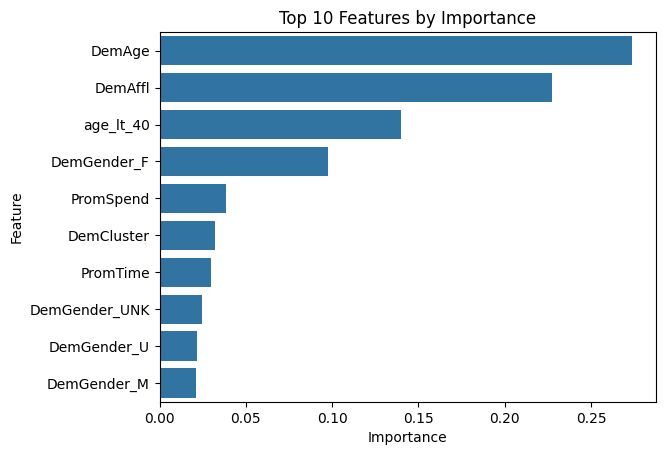

In [17]:
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Features by Importance')
plt.show()

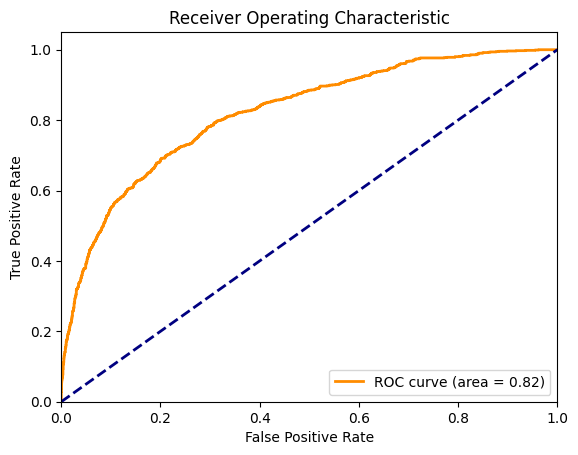

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_probs = rf_pipeline.predict_proba(X_test[numeric_features + categorical_features])[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


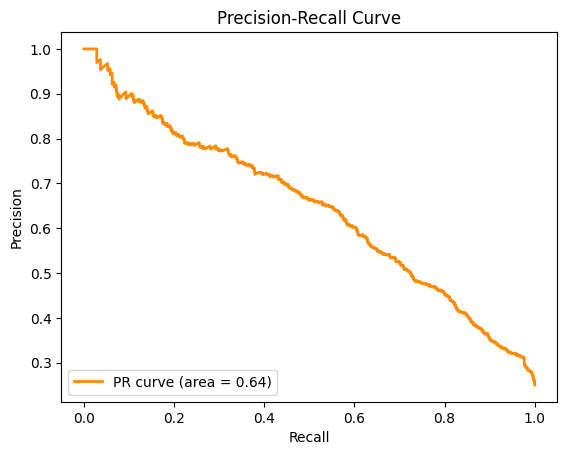

In [19]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall curve and PR area
precision, recall, _ = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)

# Plot PR curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [49]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Define a range of thresholds
thresholds = [i * 0.1 for i in range(1, 10)]

# Initialize lists to store metrics
precision_list = []
recall_list = []
f1_list = []
fpr_list = []

for threshold in thresholds:
    y_pred_threshold = (y_probs >= threshold).astype(int)
    precision_list.append(precision_score(y_test, y_pred_threshold))
    recall_list.append(recall_score(y_test, y_pred_threshold))
    f1_list.append(f1_score(y_test, y_pred_threshold))

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()
    fpr = fp / (fp + tn)
    fpr_list.append(fpr)

# Create a DataFrame
operating_table = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'FPR': fpr_list
})

# Display the table
operating_table.query('FPR < 0.05')



,Threshold,Precision,Recall,F1 Score,FPR
5,0.6,0.777778,0.283019,0.415020,0.027011
6,0.7,0.845794,0.162624,0.272796,0.009904
7,0.8,0.901099,0.073675,0.136213,0.002701
8,0.9,0.000000,0.000000,0.000000,0.000000


DALEX

In [51]:
!pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.0-py3-none-any.whl size=1042471 sha256=b77ad3e7721a89411d347c07fc5743232ca99fdefc4562132fbb3a163b44f6f1
  Stored in directory: /root/.cache/pip/wheels/e2/38/c1/25a95206a4873a287d776fc8e77aa7d93971acc643ecb3db38
Successfully built dalex


In [53]:
import dalex as dx

dx_explainer = dx.Explainer(rf_pipeline, X_test,
                            y_test.values,
                           label='TargetBuy')

Preparation of a new explainer is initiated

  -> data              : 4445 rows 11 cols
  -> target variable   : 4445 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : TargetBuy
  -> predict function  : <function yhat_proba_default at 0x792bf6f35750> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0261, mean = 0.246, max = 0.877
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.84, mean = 0.00439, max = 0.957
  -> model_info        : package sklearn

A new explainer has been created!


In [54]:
mp_default = dx_explainer.model_performance("classification")
mp_default.result

,recall,precision,f1,accuracy,auc
TargetBuy,0.405211,0.722756,0.519286,0.812148,0.819923


In [55]:
# Calculate feature importance
fi = dx_explainer.model_parts()

# Plot feature importance
fi.plot()

In [57]:
# Let's say you want to create PDPs for a feature named 'feature_name'
profile = dx_explainer.model_profile(variables=['DemAffl', 'DemAge'])

# Now, plot the PDP for 'feature_name'
profile.plot()

Calculating ceteris paribus: 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]


In [59]:
# Let's say you want to create PDPs for a feature named 'feature_name'
profile = dx_explainer.model_profile(variables=['DemGender'], variable_type = "categorical")

# Now, plot the PDP for 'feature_name'
profile.plot()

Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]


In [64]:
test_data = X_test.copy()
#test_data['TargetBuy'] = y_test.values
#test_data['prob_default'] = rf_pipeline.predict_proba(X_test)[:,1]
#test_data['pred_default'] = rf_pipeline.predict(X_test)
#top_10_tp = test_data.sort_values(by='prob_default', ascending=False).head(10).reset_index(drop=True)

top_10_tp

,DemAffl,DemAge,DemCluster,PromSpend,PromTime,age_lt_40,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,TargetBuy,prob_default,pred_default
0,18.0,35.0,29.0,500.00,1.0,1,D,F,Midlands,East,Silver,1,0.877170,1
1,20.0,38.0,37.0,7500.00,1.0,1,E,F,Midlands,Midlands,Gold,1,0.873291,1
2,16.0,39.0,34.0,100.00,11.0,1,D,F,South East,London,Silver,1,0.865565,1
3,15.0,35.0,7.0,1000.00,4.0,1,B,F,South East,London,Silver,1,0.861479,1
4,19.0,26.0,7.0,0.01,5.0,1,B,F,South East,London,Tin,1,0.861366,1
5,16.0,34.0,10.0,0.01,9.0,1,B,F,South East,London,Tin,1,0.860271,1
6,15.0,35.0,4.0,1500.00,9.0,1,A,F,Midlands,East,Silver,1,0.859434,1
7,20.0,35.0,49.0,0.01,5.0,1,F,F,Midlands,East,Tin,1,0.859430,1
8,21.0,32.0,50.0,0.01,4.0,1,F,F,South East,London,Tin,1,0.859400,1
9,15.0,22.0,4.0,1000.00,3.0,1,A,F,South East,London,Silver,1,0.856211,1


In [68]:
# Get local explanations for the first instance in X_test
example_pred = dx_explainer.predict_parts(X_test.iloc[0:1, :], type='break_down', label='TargetBuy')
example_pred

,variable_name,variable_value,variable,cumulative,contribution,sign,position,label
0,intercept,,intercept,0.246004,0.246004,1.0,12,TargetBuy
1,PromClass,Gold,PromClass = Gold,0.251965,0.005961,1.0,11,TargetBuy
2,DemCluster,2.0,DemCluster = 2.0,0.254957,0.002991,1.0,10,TargetBuy
3,PromTime,4.0,PromTime = 4.0,0.254989,0.000033,1.0,9,TargetBuy
4,DemTVReg,N East,DemTVReg = N East,0.257067,0.002077,1.0,8,TargetBuy
5,DemClusterGroup,A,DemClusterGroup = A,0.258719,0.001652,1.0,7,TargetBuy
6,DemReg,North,DemReg = North,0.249164,-0.009555,-1.0,6,TargetBuy
7,PromSpend,20000.0,PromSpend = 20000.0,0.237375,-0.011789,-1.0,5,TargetBuy
8,DemAffl,9.0,DemAffl = 9.0,0.215458,-0.021917,-1.0,4,TargetBuy
9,age_lt_40,0.0,age_lt_40 = 0.0,0.197652,-0.017807,-1.0,3,TargetBuy


In [77]:
pred = rf_pipeline.predict_proba(X_test.iloc[0:1, :])[:,1]
print(f"predicted probablity {pred[0]:,.3f}")
example_pred.plot()

predicted probablity 0.101
